# Parameterization, PZ models, Zooplankton population models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes for all plots, now all subsequent plots will follow these settings
plt.rcParams.update({
    'axes.labelsize': 14,          # Labels font size
    'xtick.labelsize': 14,         # X-axis ticks font size
    'ytick.labelsize': 14,         # Y-axis ticks font size
    'axes.labelweight': 'bold',    # Bold axis labels
    'xtick.direction': 'out',       # X-axis tick direction
    'ytick.direction': 'out',       # Y-axis tick direction
    'font.size': 14,               # Default font size for other text
})

fig_dir = "E:\OneDrive\EcoSysModel\plot" # dir to save plots

### Part II. 
#### 2.	Consider a copepod population that has a life history with the following life history stages: eggs, nauplii, copepodid 1-3 (C13), copepodid 4-5 (C45), and adults. The life stages have different growth and mortality rates. The development of a cohort is initiated by a pulse of eggs.  Reproduction is set by mortality.   

* Development times were: 
    * 3.5 days for Eggs to Nauplii,
    * 6 days for Nauplii to C13, 
    * 8 days for C13 to C45, 
    * 10 days for C45 to adults, 
    * The life span of the adult copepod is 12 days
    * The developmental rates are such that 13% of a stage remains undeveloped at the end of the developmental time. 
        * note: Specific Development rates for each life stage, calculated from e^(-rt) = ln(0.13)
* The mortality losses for each copepod stage relative to the initial population are: 
    * 80%, 80%, 60%, 40%, 30%
        * note: mortality rates for each life stage, calculated from e^(-rt) = ln(1-percent loss)

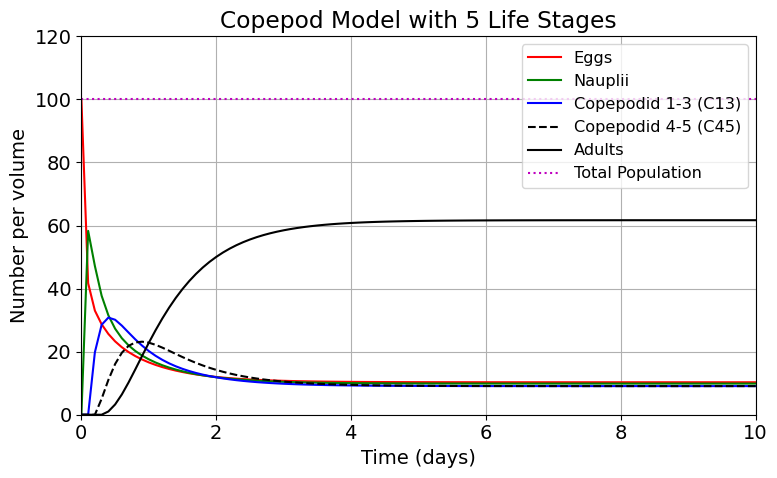

In [2]:
# Parameters
nsize = 5  # number of size classes
ntime = 101  # number of time steps
dt = 0.1  # time interval (days)

# Initial numbers for each stage
Cinit = [100, 0, 0, 0, 0]  # 100 eggs, rest zero


# Specific Development rates for each life stage, calculated from e^(-rt) = ln(0.13)
Grow = np.array([0.583, 0.340, 0.255, 0.204, 0.0])  # Adults don't grow to next stage

# Mortality rates for each life stage
Mort = np.array([0.460, 0.268, 0.115, 0.051, 0.030])

# Create arrays
C = np.zeros((ntime, nsize))
time = np.zeros(ntime)

# Set initial condition
C[0, :] = Cinit

# For loop
for it in range(1, ntime):
    time[it] = time[it-1] + dt

    # Reproduction term: mortality loss summed across stages
    Rep = np.sum(C[it-1, :] * Mort)  # reproduction matches mortality

    # Update each stage
    C[it, 0] = C[it-1, 0] - Grow[0]*C[it-1, 0] - Mort[0]*C[it-1, 0] + Rep
    C[it, 1] = C[it-1, 1] - Grow[1]*C[it-1, 1] + Grow[0]*C[it-1, 0] - Mort[1]*C[it-1, 1]
    C[it, 2] = C[it-1, 2] - Grow[2]*C[it-1, 2] + Grow[1]*C[it-1, 1] - Mort[2]*C[it-1, 2]
    C[it, 3] = C[it-1, 3] - Grow[3]*C[it-1, 3] + Grow[2]*C[it-1, 2] - Mort[3]*C[it-1, 3]
    C[it, 4] = C[it-1, 4] + Grow[3]*C[it-1, 3] - Mort[4]*C[it-1, 4]

# check model for conservation of individuals.
Pop = np.sum(C, axis=1)  

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, C[:, 0], 'r-', label='Eggs')
plt.plot(time, C[:, 1], 'g-', label='Nauplii')
plt.plot(time, C[:, 2], 'b-', label='Copepodid 1-3 (C13)')
plt.plot(time, C[:, 3], 'k--', label='Copepodid 4-5 (C45)')
plt.plot(time, C[:, 4], 'k-', label='Adults')
plt.plot(time, Pop, 'm:', label='Total Population')

plt.title('Copepod Model with 5 Life Stages')
plt.xlabel('Time (days)')
plt.ylabel('Number per volume')
plt.ylim([0, 120])
plt.xlim([0, 10])
plt.legend(loc='upper right',fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{fig_dir}/Zooplankton_Model_5_life_stages.png', bbox_inches='tight', dpi = 300)
plt.show()

### j)   Rerun the model for the following modifications to the reference solution. Plot and describe the solutions and compare these to the reference solution. 
* C13 mortality loss: 90%
    *  the mortality rate for C13: ln(1-0.9)/8 = 0.2878 d-1
* Adult mortality loss:  90%
    * the mortality rate for Adults = -ln(0.1)/12 = 0.192 d-1
* Egg development time of 5 days
    * egg specific development rate = -ln(0.13)/5 = 0.408 d-1


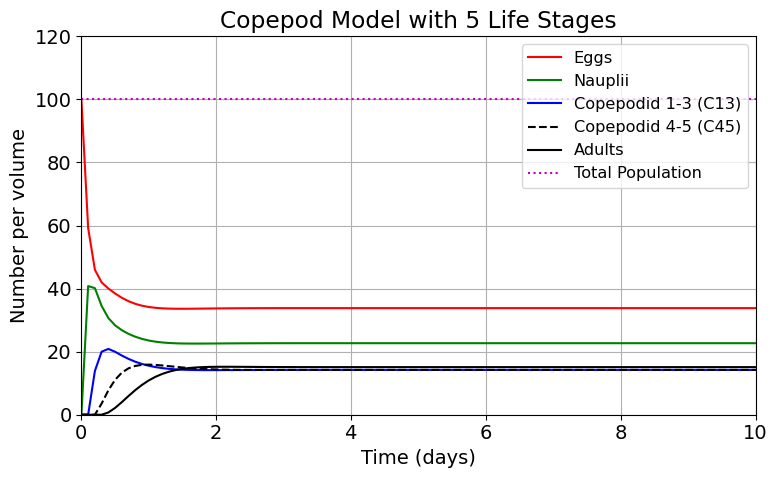

In [3]:
# Initial numbers for each stage
Cinit = [100, 0, 0, 0, 0]  # 100 eggs, rest zero

# Specific Development rates for each life stage
# Grow = np.array([0.583, 0.340, 0.255, 0.204, 0.0])  # reference
Grow = np.array([0.408, 0.340, 0.255, 0.204, 0.0])  # Grow[0], eggs development rate updated
# Mortality rates for each life stage
# Mort = np.array([0.460, 0.268, 0.115, 0.051, 0.030]) # reference
Mort = np.array([0.460, 0.268, 0.2878, 0.051, 0.192])  # Mort[2], Mort[4] updated for C13, and Adults

# Create arrays
C = np.zeros((ntime, nsize))
time = np.zeros(ntime)

# Set initial condition
C[0, :] = Cinit

# For loop
for it in range(1, ntime):
    time[it] = time[it-1] + dt

    # Reproduction term: mortality loss summed across stages
    Rep = np.sum(C[it-1, :] * Mort)  # reproduction matches mortality

    # Update each stage
    C[it, 0] = C[it-1, 0] - Grow[0]*C[it-1, 0] - Mort[0]*C[it-1, 0] + Rep
    C[it, 1] = C[it-1, 1] - Grow[1]*C[it-1, 1] + Grow[0]*C[it-1, 0] - Mort[1]*C[it-1, 1]
    C[it, 2] = C[it-1, 2] - Grow[2]*C[it-1, 2] + Grow[1]*C[it-1, 1] - Mort[2]*C[it-1, 2]
    C[it, 3] = C[it-1, 3] - Grow[3]*C[it-1, 3] + Grow[2]*C[it-1, 2] - Mort[3]*C[it-1, 3]
    C[it, 4] = C[it-1, 4] + Grow[3]*C[it-1, 3] - Mort[4]*C[it-1, 4]

# check model for conservation of individuals.
Pop = np.sum(C, axis=1)
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(time, C[:, 0], 'r-', label='Eggs')
plt.plot(time, C[:, 1], 'g-', label='Nauplii')
plt.plot(time, C[:, 2], 'b-', label='Copepodid 1-3 (C13)')
plt.plot(time, C[:, 3], 'k--', label='Copepodid 4-5 (C45)')
plt.plot(time, C[:, 4], 'k-', label='Adults')
plt.plot(time, Pop, 'm:', label='Total Population')

plt.title('Copepod Model with 5 Life Stages')
plt.xlabel('Time (days)')
plt.ylabel('Number per volume')
plt.ylim([0, 120])
plt.xlim([0, 10])
plt.legend(loc='upper right',fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.savefig(f'{fig_dir}/Zooplankton_Model_5_life_stages_01.png', bbox_inches='tight', dpi = 300)
plt.show()

### Part I. 
### 1.	Consider the interaction of phytoplankton (P) and zooplankton (Z) 
#### c) i. Use an Euler approximation for the finite difference form of the terms.  ii.	Implement the code using the initial conditions, total time (ntime) = 500, and delt = 0.1 day.


In [4]:
# Initial conditions (converted from Q1b)

# set phytoplankton and zooplankton initial values
P0 = 0.8176  # phytoplankton (µmol N/L)
Z0 = 0.0755  # zooplankton (µmol N/L)

# Parameters
# set phytoplankton parameter values
beta = 0.83    # (1/day)
K = 10.0       # (µmol N/L)
# set zooplankton parameter values
gamma1 = 0.5   # (1/day)
alpha = 0.73    # (µmol N/L) 
gamma = 0.5    # (unitless, growth efficiency)
omega = 0.34   # (1/day)

# Time settings
delt = 0.1    # time step (days)
ntime = 500
t = np.linspace(0, delt*ntime, ntime)

# Create arrays
P = np.zeros(ntime)
Z = np.zeros(ntime)

# Set initial values
P[0] = P0
Z[0] = Z0

# Euler integration
for i in range(ntime-1):
    # Compute derivatives
    pgrow1 = beta * P[i] * (K - P[i]) / K
    zgraz1 = gamma1 * (P[i]**2) / (alpha**2 + P[i]**2) * Z[i]
    dPdt = pgrow1 - zgraz1

    zgrow1 = gamma * Z[i] * (P[i]**2) / (alpha**2 + P[i]**2)
    zloss1 = omega * Z[i]
    dZdt = zgrow1 - zloss1

    # Update
    P[i+1] = P[i] + delt * dPdt
    Z[i+1] = Z[i] + delt * dZdt

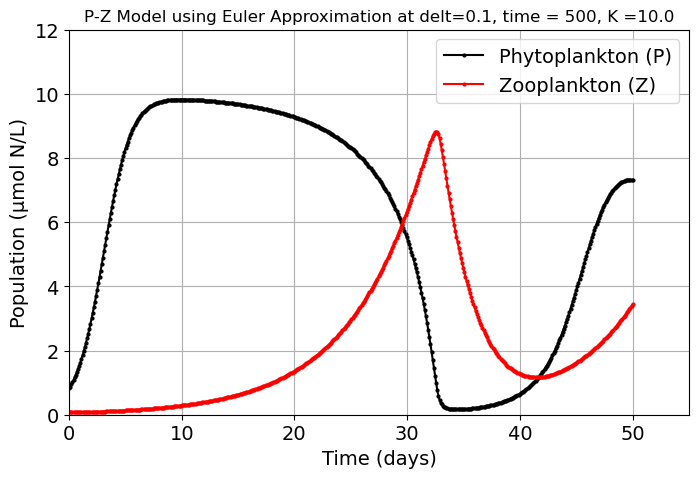

In [5]:
# Plotting
plt.figure(figsize=(8,5))
plt.plot(t, P, marker='o', linestyle='-', markersize = 2, color = 'black',label='Phytoplankton (P)')
plt.plot(t, Z, marker='o', linestyle='-', markersize = 2,color = 'red',label='Zooplankton (Z)')
plt.xlabel('Time (days)')
plt.ylabel('Population (µmol N/L)')
plt.ylim([0,12])
plt.xlim([0,55])
plt.title(f'P-Z Model using Euler Approximation at delt={delt}, time = {ntime}, K ={K}', fontsize =12)
plt.legend(loc = 'upper right')
plt.grid()
# save plot
plt.savefig(f'{fig_dir}/P-Z_Model_Euler_Method_at_t={ntime}.png', bbox_inches='tight', dpi = 300)
plt.show()


#### d)	How do these results change for K=1?

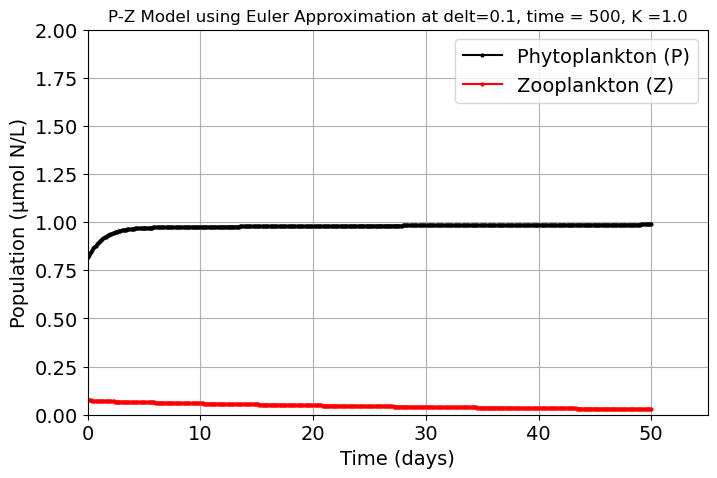

In [6]:
K = 1.0
ntime = 500
t = np.linspace(0, delt*ntime, ntime)
# # Create arrays
P = np.zeros(ntime)
Z = np.zeros(ntime)

P[0] = P0
Z[0] = Z0
# Euler integration
for i in range(ntime-1):
    # Compute derivatives
    pgrow1 = beta * P[i] * (K - P[i]) / K
    zgraz1 = gamma1 * (P[i]**2) / (alpha**2 + P[i]**2) * Z[i]
    dPdt = pgrow1 - zgraz1

    zgrow1 = gamma * Z[i] * (P[i]**2) / (alpha**2 + P[i]**2)
    zloss1 = omega * Z[i]
    dZdt = zgrow1 - zloss1

    # Update
    P[i+1] = P[i] + delt * dPdt
    Z[i+1] = Z[i] + delt * dZdt

# Plotting
plt.figure(figsize=(8,5))
plt.plot(t, P, marker='o', linestyle='-', markersize = 2, color = 'black',label='Phytoplankton (P)')
plt.plot(t, Z, marker='o', linestyle='-', markersize = 2,color = 'red',label='Zooplankton (Z)')
plt.xlabel('Time (days)')
plt.ylabel('Population (µmol N/L)')
plt.ylim([0,2])
plt.xlim([0,55])
plt.title(f'P-Z Model using Euler Approximation at delt={delt}, time = {ntime}, K ={K}', fontsize =12)
plt.legend(loc = 'upper right')
plt.grid()
# save plot
plt.savefig(f'{fig_dir}/P-Z_Model_Euler_Method_at_K={K}.png', bbox_inches='tight', dpi = 300)
plt.show()


#### e)	Implement the model using ntime = 1500.  How do these results compare to those in part c?

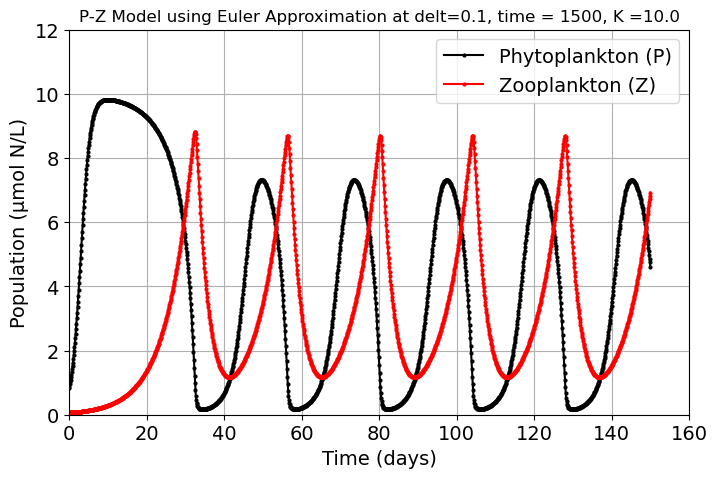

In [7]:
K =10.0
# Time settings
ntime = 1500

t = np.linspace(0, delt*ntime, ntime)
# # Create arrays
P = np.zeros(ntime)
Z = np.zeros(ntime)

P[0] = P0
Z[0] = Z0
# Euler integration
for i in range(ntime-1):
    # Compute derivatives
    pgrow1 = beta * P[i] * (K - P[i]) / K
    zgraz1 = gamma1 * (P[i]**2) / (alpha**2 + P[i]**2) * Z[i]
    dPdt = pgrow1 - zgraz1

    zgrow1 = gamma * Z[i] * (P[i]**2) / (alpha**2 + P[i]**2)
    zloss1 = omega * Z[i]
    dZdt = zgrow1 - zloss1

    # Update
    P[i+1] = P[i] + delt * dPdt
    Z[i+1] = Z[i] + delt * dZdt

# Plotting
plt.figure(figsize=(8,5))
plt.plot(t, P, marker='o', linestyle='-', markersize = 2, color = 'black',label='Phytoplankton (P)')
plt.plot(t, Z, marker='o', linestyle='-', markersize = 2,color = 'red',label='Zooplankton (Z)')
plt.xlabel('Time (days)')
plt.ylabel('Population (µmol N/L)')
plt.ylim([0,12])
plt.xlim([0,160])
plt.title(f'P-Z Model using Euler Approximation at delt={delt}, time = {ntime}, K ={K}', fontsize =12)
plt.legend(loc = 'upper right')
plt.grid()
# save plot
plt.savefig(f'{fig_dir}/P-Z_Model_Euler_Method_at_t={ntime}.png', bbox_inches='tight', dpi = 300)
plt.show()


#### f)	Implement the code using delt = 0.8, for K=10 and K=1.  How do these results compare to those in part e?  

In [8]:
import warnings
# Suppress overflow and invalid value warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

K =10.0
# Time settings
delt = 0.8    # time step (days)
ntime = 1500

t = np.linspace(0, delt*ntime, ntime)
# # Create arrays
P = np.zeros(ntime)
Z = np.zeros(ntime)

P[0] = P0
Z[0] = Z0
# Euler integration
for i in range(ntime-1):
    # Compute derivatives
    pgrow1 = beta * P[i] * (K - P[i]) / K
    zgraz1 = gamma1 * (P[i]**2) / (alpha**2 + P[i]**2) * Z[i]
    dPdt = pgrow1 - zgraz1

    zgrow1 = gamma * Z[i] * (P[i]**2) / (alpha**2 + P[i]**2)
    zloss1 = omega * Z[i]
    dZdt = zgrow1 - zloss1

    # Update
    P[i+1] = P[i] + delt * dPdt
    Z[i+1] = Z[i] + delt * dZdt


In [9]:
K1 =1.0
# Time settings
delt = 0.8    # time step (days)
ntime = 1500

t = np.linspace(0, delt*ntime, ntime)
# # Create arrays
P1 = np.zeros(ntime)
Z1 = np.zeros(ntime)

P1[0] = P0
Z1[0] = Z0
# Euler integration
for i in range(ntime-1):
    # Compute derivatives
    pgrow1 = beta * P1[i] * (K1 - P1[i]) / K1
    zgraz1 = gamma1 * (P1[i]**2) / (alpha**2 + P1[i]**2) * Z1[i]
    dPdt = pgrow1 - zgraz1

    zgrow1 = gamma * Z1[i] * (P1[i]**2) / (alpha**2 + P1[i]**2)
    zloss1 = omega * Z1[i]
    dZdt = zgrow1 - zloss1

    # Update
    P1[i+1] = P1[i] + delt * dPdt
    Z1[i+1] = Z1[i] + delt * dZdt

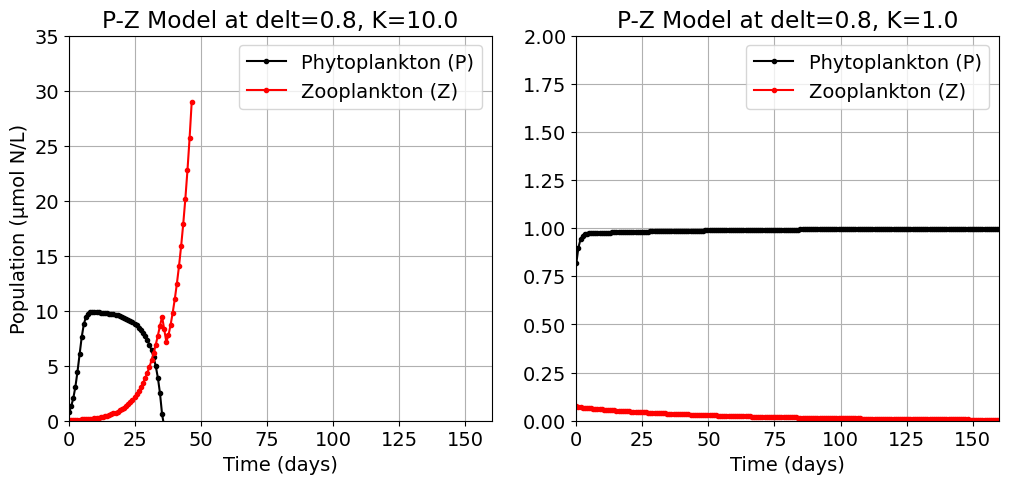

In [10]:
# Plotting
plt.figure(figsize=(12,5))
ax0 = plt.subplot(121)
ax0.plot(t, P, marker='o', linestyle='-', markersize = 3, color = 'black',label='Phytoplankton (P)')
ax0.plot(t, Z, marker='o', linestyle='-', markersize = 3,color = 'red',label='Zooplankton (Z)')
ax0.set_xlabel('Time (days)')
ax0.set_ylabel('Population (µmol N/L)')
ax0.set_ylim([0,35])
ax0.set_xlim([0,160])
ax0.set_title(f'P-Z Model at delt={delt}, K={K}')
ax0.legend(loc = 'upper right')
ax0.grid()

ax1 = plt.subplot(122)
ax1.plot(t, P1, marker='o', linestyle='-', markersize = 3, color = 'black',label='Phytoplankton (P)')
ax1.plot(t, Z1, marker='o', linestyle='-', markersize = 3,color = 'red',label='Zooplankton (Z)')
ax1.set_xlabel('Time (days)')
# ax1.set_ylabel('Population (µmol N/L)')
ax1.set_ylim([0,2])
ax1.set_xlim([0,160])
ax1.set_title(f'P-Z Model at delt={delt}, K={K1}')
ax1.legend(loc = 'upper right')
ax1.grid()

# save plot
plt.savefig(f'{fig_dir}/P-Z_Model_Euler_Method_at_delt={delt}.png', bbox_inches='tight', dpi = 300)
plt.show()

